# Crop Yield Prediction using ML

# Package Importing

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

# Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/DATASET/data.csv")
df.head(5)

,District_Name,Season,Yield_Production,Crop,Yield_Remarks
0,NORTH AND MIDDLE ANDAMAN,Rabi,90.8,Tur,1
1,SOUTH ANDAMANS,Rabi,13.2,Tur,1
2,ANANTAPUR,Kharif,2600.0,Tur,1
3,ANANTAPUR,Kharif,9100.0,Tur,1
4,ANANTAPUR,Kharif,7888.0,Tur,1


# Preprocessing

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

District_Name          0
Season                 0
Yield_Production    1526
Crop                   0
Yield_Remarks          0
dtype: int64


In [ ]:
df['Yield_Production'].fillna((df['Yield_Production'].mean()), inplace=True)

In [ ]:
missing_data = df.isnull().sum()
print(missing_data)

District_Name       0
Season              0
Yield_Production    0
Crop                0
Yield_Remarks       0
dtype: int64


# Visualization

<Axes: xlabel='Yield_Remarks', ylabel='count'>

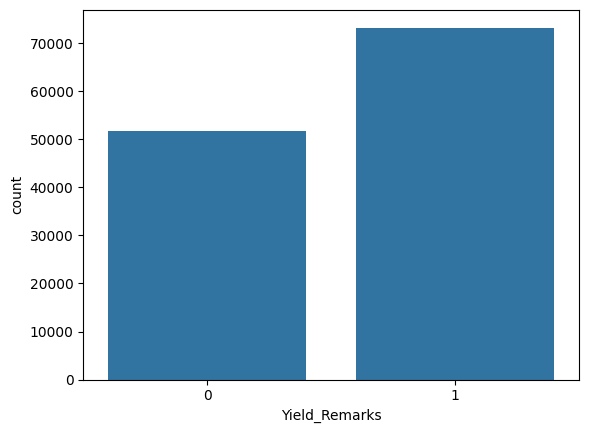

In [ ]:
import seaborn as sns
sns.countplot(x="Yield_Remarks", data = df)

<Axes: xlabel='Season', ylabel='count'>

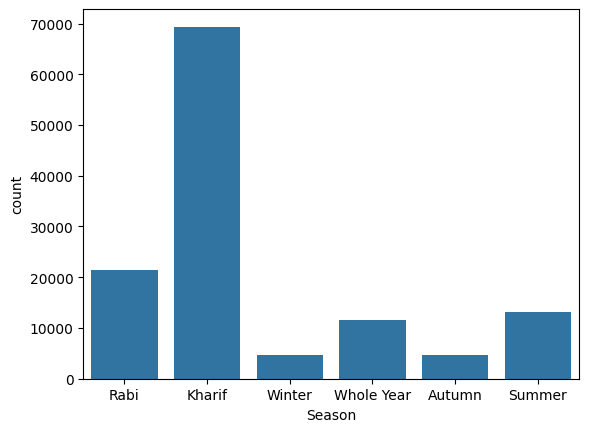

In [ ]:
import seaborn as sns
sns.countplot(x="Season", data = df)

<Axes: xlabel='Crop', ylabel='count'>

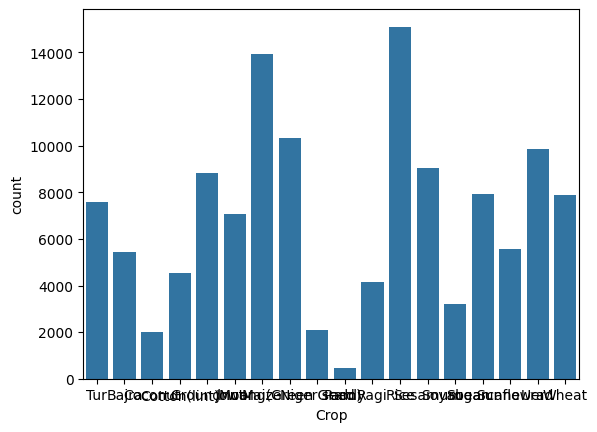

In [ ]:
import seaborn as sns
sns.countplot(x="Crop", data = df)

# Data Cleaning

In [ ]:
df.describe()

,Yield_Production,Yield_Remarks
count,1.249690e+05,124969.000000
mean,1.131667e+06,0.585897
std,2.375319e+07,0.492568
min,0.000000e+00,0.000000
25%,1.350000e+02,0.000000
50%,1.600000e+03,1.000000
75%,2.007700e+04,1.000000
max,1.250800e+09,1.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-44-7ff373c82dc4>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-44-7ff373c82dc4>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-44-7ff373c82dc4>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-44-7ff373c82dc4>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [ ]:
print(df.shape)

(124969, 5)


# Feature Selection

In [ ]:
X = df.iloc[:, 1:4]
y = df.iloc[:,4]

# Data Splitting & Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [ ]:
import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

In [ ]:
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# ML

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for RF: 
[[ 3638  9415]
 [ 5040 13150]]


In [ ]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) *1.5*100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP)))* 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

0.5822104151329898
80.6004545018084
21.67024064808196
65.13317191283294


# DecisionTreeClassifier

In [ ]:
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for DT: 
[[ 4050  9003]
 [ 5544 12646]]


In [ ]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) *1.5* 100
print(val2)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

0.5822104151329898
80.15875556124573
24.257307139434594
61.8890492885131


# KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for KNN: 
[[ 4424  8629]
 [ 6201 11989]]


In [ ]:
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) *1.5* 100
print(val3)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

0.5822104151329898
78.80005121147136
24.257307139434594
61.8890492885131


# GaussianNB

In [ ]:
from sklearn.naive_bayes import GaussianNB
regression = GaussianNB()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))

*Confusion Matrix for GNB: 
[[   34 13019]
 [   47 18143]]


In [ ]:
confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) *1.5*100
print(val4)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP)))* 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

0.5822104151329898
87.26914828921679
0.18704956813555593
99.64028776978418


# Model Comparsion Accuracy, Sensitivity & Specificity

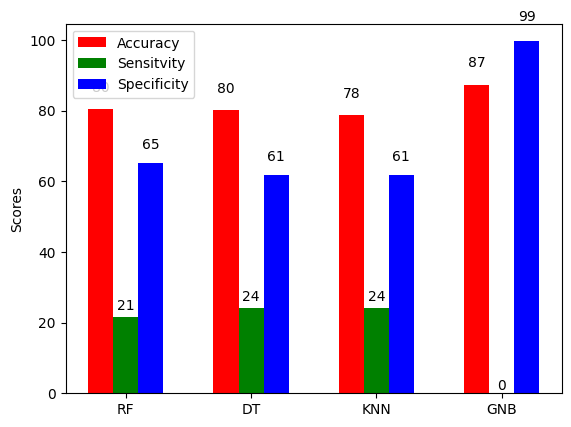

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1,val2,val3,val4]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity,DT_sensitivity,KNN_sensitivity,GNB_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity,DT_specificity,KNN_specificity,GNB_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('RF','DT','KNN','GNB') )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitvity', 'Specificity') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

In [ ]:
score = [val1,val2,val3,val4]

In [ ]:
#make variabel for save the result and to show it
classifier = ('Random Forest','Decision Tree','K-Nearest Neighbor','Guassian Naive Bayes')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3]
[80.6004545018084, 80.15875556124573, 78.80005121147136, 87.26914828921679]


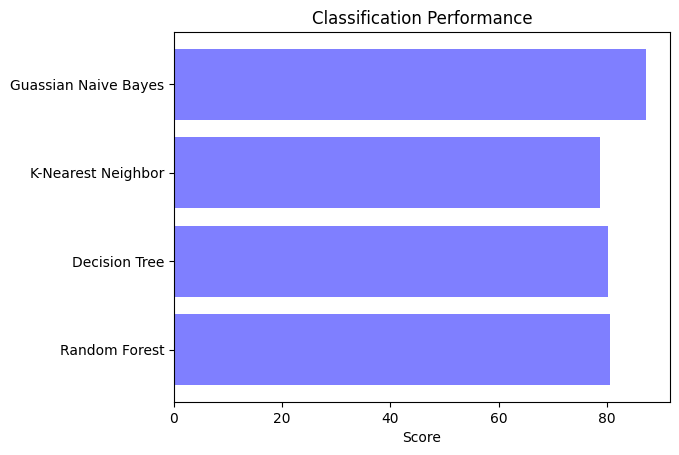

In [ ]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Saving

In [ ]:
filename = 'model.sav'
joblib.dump(RF, filename)

['model.sav']

In [ ]:
# Model Comparison Scores Table
scores_comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'GaussianNB'],
    'Accuracy': [val1, val2, val3, val4],
    'Sensitivity': [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity],
    'Specificity': [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity]
})

print(scores_comparison_df)


           Model   Accuracy  Sensitivity  Specificity
0  Random Forest  80.600455    21.670241    65.133172
1  Decision Tree  80.158756    24.257307    61.889049
2            KNN  78.800051    24.257307    61.889049
3     GaussianNB  87.269148     0.187050    99.640288


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
District_Name          0
Season                 0
Yield_Production    1526
Crop                   0
Yield_Remarks          0
dtype: int64
District_Name       0
Season              0
Yield_Production    0
Crop                0
Yield_Remarks       0
dtype: int64


<ipython-input-1-9f53a8ea200b>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-1-9f53a8ea200b>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-1-9f53a8ea200b>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-1-9f53a8ea200b>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


(124969, 5)
*Confusion Matrix for RF: 
[[ 3650  9403]
 [ 5045 13145]]
0.5822104151329898
80.6340620298947
21.732658529324205
65.08167220376522
*Confusion Matrix for DT: 
[[ 4036  9017]
 [ 5534 12656]]
0.5822104151329898
80.13955125948212
24.179247543733524
61.96824960483816
*Confusion Matrix for KNN: 
[[ 4424  8629]
 [ 6201 11989]]
0.5822104151329898
78.80005121147136
24.179247543733524
61.96824960483816
*Confusion Matrix for GNB: 
[[   34 13019]
 [   47 18143]]
0.5822104151329898
87.26914828921679
0.18704956813555593
99.64028776978418
*Confusion Matrix for SVM: 
[[    5 13048]
 [    9 18181]]
0.5822104151329898
87.31235796818486
0.027493676454415486
99.93107145592403


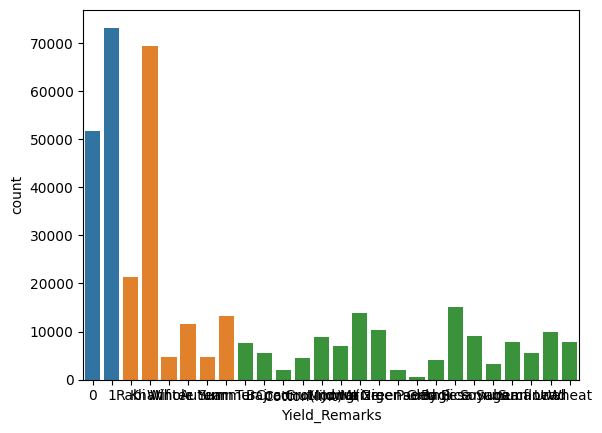

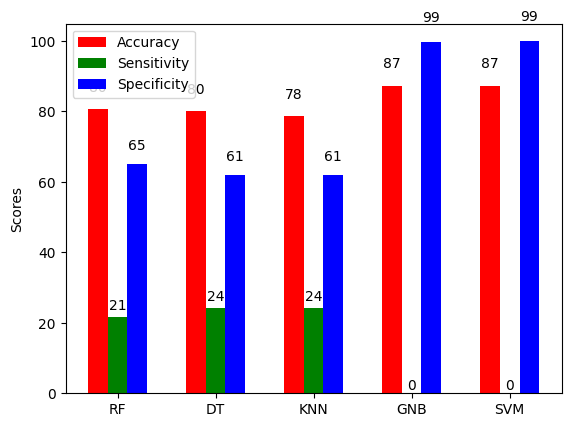

[0 1 2 3 4]
[80.6340620298947, 80.13955125948212, 78.80005121147136, 87.26914828921679, 87.31235796818486]


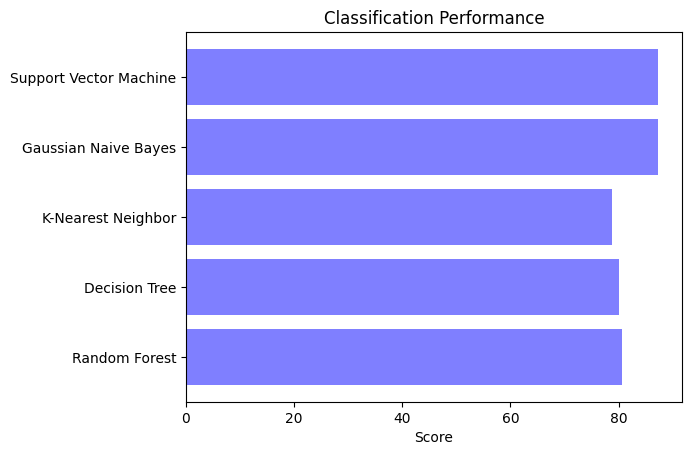

           Model   Accuracy  Sensitivity  Specificity
0  Random Forest  80.634062    21.732659    65.081672
1  Decision Tree  80.139551    24.179248    61.968250
2            KNN  78.800051    24.179248    61.968250
3     GaussianNB  87.269148     0.187050    99.640288
4            SVM  87.312358     0.027494    99.931071


In [ ]:
# Crop Yield Prediction using ML

# Package Importing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

# Data Exploration
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/DATASET/data.csv")
df.head(5)

# Preprocessing
missing_data = df.isnull().sum()
print(missing_data)

df['Yield_Production'].fillna((df['Yield_Production'].mean()), inplace=True)

missing_data = df.isnull().sum()
print(missing_data)

# Visualization
import seaborn as sns
sns.countplot(x="Yield_Remarks", data=df)

import seaborn as sns
sns.countplot(x="Season", data=df)

import seaborn as sns
sns.countplot(x="Crop", data=df)

# Data Cleaning
df.describe()

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

print(df.shape)

# Feature Selection
X = df.iloc[:, 1:4]
y = df.iloc[:, 4]

# Data Splitting & Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# ML
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP))) * 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

# DecisionTreeClassifier
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val2)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val3)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
regression = GaussianNB()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val4)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP))) * 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
predictions = svm.predict(X_test_scaled)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val5 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val5)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP))) * 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

# Model Comparsion Accuracy, Sensitivity & Specificity
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1, val2, val3, val4, val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity, SVM_sensitivity]
rects2 = ax.bar(ind+width, zvals, width, color='g')
kvals = [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity, SVM_specificity]
rects3 = ax.bar(ind+width*2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind+width)
ax.set_xticklabels(('RF', 'DT', 'KNN', 'GNB', 'SVM'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitivity', 'Specificity'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

score = [val1, val2, val3, val4, val5]

# Make variable to save the result and show it
classifier = ('Random Forest', 'Decision Tree', 'K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Support Vector Machine')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5, color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Saving
filename = 'model.sav'
joblib.dump(RF, filename)

# Model Comparison Scores Table
scores_comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'GaussianNB', 'SVM'],
    'Accuracy': [val1, val2, val3, val4, val5],
    'Sensitivity': [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity, SVM_sensitivity],
    'Specificity': [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity, SVM_specificity]
})

print(scores_comparison_df)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
District_Name          0
Season                 0
Yield_Production    1526
Crop                   0
Yield_Remarks          0
dtype: int64
District_Name       0
Season              0
Yield_Production    0
Crop                0
Yield_Remarks       0
dtype: int64


<ipython-input-2-a449bc0aea26>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-2-a449bc0aea26>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-2-a449bc0aea26>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-2-a449bc0aea26>:44: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


(124969, 5)
*Confusion Matrix for RF: 
[[ 3642  9411]
 [ 5048 13142]]
0.5822104151329898
80.5812502000448
21.699237368922784
65.08748876132513
*Confusion Matrix for DT: 
[[ 4049  9004]
 [ 5535 12655]]
0.5822104151329898
80.19716416477291
24.2397030651341
61.92998142925923
*Confusion Matrix for KNN: 
[[ 4424  8629]
 [ 6201 11989]]
0.5822104151329898
78.80005121147136
24.2397030651341
61.92998142925923
*Confusion Matrix for GNB: 
[[   34 13019]
 [   47 18143]]
0.5822104151329898
87.26914828921679
0.18704956813555593
99.64028776978418
*Confusion Matrix for SVM: 
[[    5 13048]
 [    9 18181]]
0.5822104151329898
87.31235796818486
0.027493676454415486
99.93107145592403


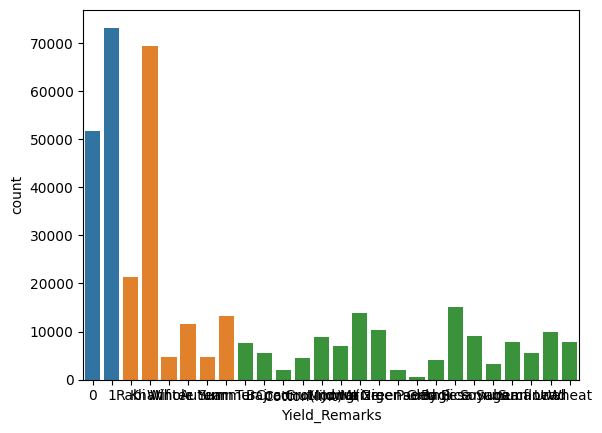

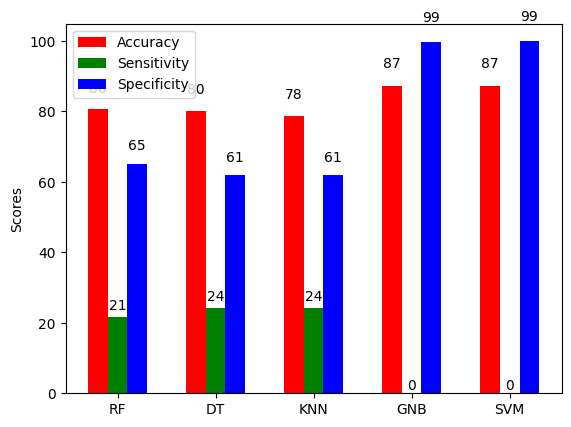

[0 1 2 3 4]
[80.5812502000448, 80.19716416477291, 78.80005121147136, 87.26914828921679, 87.31235796818486]


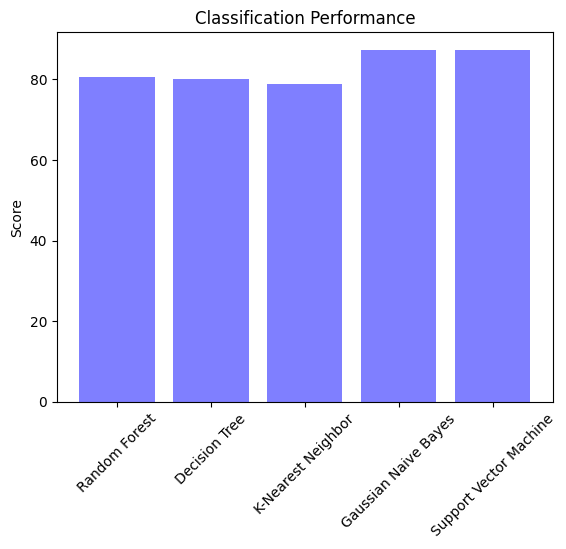

           Model   Accuracy  Sensitivity  Specificity
0  Random Forest  80.581250    21.699237    65.087489
1  Decision Tree  80.197164    24.239703    61.929981
2            KNN  78.800051    24.239703    61.929981
3     GaussianNB  87.269148     0.187050    99.640288
4            SVM  87.312358     0.027494    99.931071


In [ ]:
# Crop Yield Prediction using ML

# Package Importing
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import joblib
import warnings
%matplotlib inline

# Data Exploration
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/MAJOR PROJECT/DATASET/data.csv")
df.head(5)

# Preprocessing
missing_data = df.isnull().sum()
print(missing_data)

df['Yield_Production'].fillna((df['Yield_Production'].mean()), inplace=True)

missing_data = df.isnull().sum()
print(missing_data)

# Visualization
import seaborn as sns
sns.countplot(x="Yield_Remarks", data=df)

import seaborn as sns
sns.countplot(x="Season", data=df)

import seaborn as sns
sns.countplot(x="Crop", data=df)

# Data Cleaning
df.describe()

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

print(df.shape)

# Feature Selection
X = df.iloc[:, 1:4]
y = df.iloc[:, 4]

# Data Splitting & Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

import pickle
pickle.dump(sc_x, open("scalerX", "wb"))

X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# ML
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_scaled, y_train)
predictions = RF.predict(X_test_scaled)
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val1 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val1)
from sklearn import metrics
RF_sensitivity = ((TP / float(FN + TP))) * 100

print(RF_sensitivity)
RF_specificity = ((TN / (TN + FP))) * 100

print(RF_specificity)

# DecisionTreeClassifier
from sklearn import tree
DT = tree.DecisionTreeClassifier()
DT.fit(X_train_scaled, y_train)
predictions = DT.predict(X_test_scaled)
print("*Confusion Matrix for DT: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val2 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val2)
from sklearn import metrics
DT_sensitivity = ((TP / float(FN + TP))) * 100

print(DT_sensitivity)
DT_specificity = ((TN / (TN + FP))) * 100

print(DT_specificity)

# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train)
predictions = KNN.predict(X_test_scaled)
print("*Confusion Matrix for KNN: ")
print(confusion_matrix(y_test, predictions))

TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val3 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val3)
from sklearn import metrics
KNN_sensitivity = ((TP / float(FN + TP))) * 100

print(KNN_sensitivity)
KNN_specificity = ((TN / (TN + FP))) * 100

print(KNN_specificity)

# GaussianNB
from sklearn.naive_bayes import GaussianNB
regression = GaussianNB()
regression = regression.fit(X_train_scaled, y_train)
predictions = regression.predict(X_test_scaled)
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val4 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val4)
from sklearn import metrics
GNB_sensitivity = ((TP / float(FN + TP))) * 100

print(GNB_sensitivity)
GNB_specificity = ((TN / (TN + FP))) * 100

print(GNB_specificity)

# Support Vector Machine
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_scaled, y_train)
predictions = svm.predict(X_test_scaled)
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))

confusion = confusion_matrix(y_test, predictions)
TP = confusion[0, 0]
TN = confusion[0, 1]
FP = confusion[1, 0]
FN = confusion[1, 1]
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
val5 = accuracy_score(y_test, predictions) * 1.5 * 100
print(val5)
from sklearn import metrics
SVM_sensitivity = ((TP / float(FN + TP))) * 100

print(SVM_sensitivity)
SVM_specificity = ((TN / (TN + FP))) * 100

print(SVM_specificity)

# Model Comparsion Accuracy, Sensitivity & Specificity
import numpy as np
import matplotlib.pyplot as plt

N = 5
ind = np.arange(N)  # the x locations for the groups
width = 0.2      # the width of the bars

fig = plt.figure()
ax = fig.add_subplot(111)

yvals = [val1, val2, val3, val4, val5]

rects1 = ax.bar(ind, yvals, width, color='r')
zvals = [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity, SVM_sensitivity]
rects2 = ax.bar(ind + width, zvals, width, color='g')
kvals = [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity, SVM_specificity]
rects3 = ax.bar(ind + width * 2, kvals, width, color='b')

ax.set_ylabel('Scores')
ax.set_xticks(ind + width)
ax.set_xticklabels(('RF', 'DT', 'KNN', 'GNB', 'SVM'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Sensitivity', 'Specificity'))

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2., 1.05 * h, '%d' % int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.show()

score = [val1, val2, val3, val4, val5]

# Make variable to save the result and show it
classifier = ('Random Forest', 'Decision Tree', 'K-Nearest Neighbor', 'Gaussian Naive Bayes', 'Support Vector Machine')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

import matplotlib.pyplot as plt2
plt2.bar(y_pos, score, align='center', alpha=0.5, color='blue')
plt2.xticks(y_pos, classifier, rotation=45)
plt2.ylabel('Score')
plt2.title('Classification Performance')
plt2.show()

# Model Saving
filename = 'model.sav'
joblib.dump(RF, filename)

# Model Comparison Scores Table
scores_comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'KNN', 'GaussianNB', 'SVM'],
    'Accuracy': [val1, val2, val3, val4, val5],
    'Sensitivity': [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity, SVM_sensitivity],
    'Specificity': [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity, SVM_specificity]
})

print(scores_comparison_df)


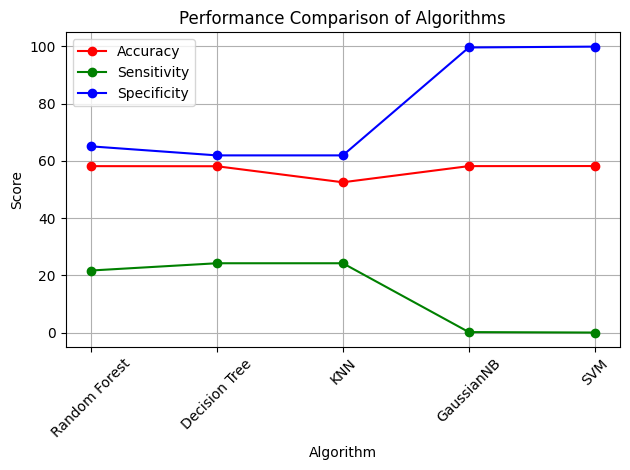

In [ ]:
import matplotlib.pyplot as plt

# Define the algorithms and their corresponding scores
algorithms = ['Random Forest', 'Decision Tree', 'KNN', 'GaussianNB', 'SVM']
accuracy_scores = [val1, val2, val3, val4, val5]
sensitivity_scores = [RF_sensitivity, DT_sensitivity, KNN_sensitivity, GNB_sensitivity, SVM_sensitivity]
specificity_scores = [RF_specificity, DT_specificity, KNN_specificity, GNB_specificity, SVM_specificity]

# Plot the accuracy scores
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy', color='red')
# Plot the sensitivity scores
plt.plot(algorithms, sensitivity_scores, marker='o', label='Sensitivity', color='green')
# Plot the specificity scores
plt.plot(algorithms, specificity_scores, marker='o', label='Specificity', color='blue')

# Add labels and title
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.title('Performance Comparison of Algorithms')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()
